In [ ]:
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# Set paths
train_path = '/content/drive/MyDrive/persian-digits'

# Open and convert images to binary matrices for training set
def open_file(folder_name, inplist, index):
    for filename in glob.glob(os.path.join(folder_name, '*.jpg')):
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        _, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
        inplist[index].append(img_binary)

train_images = [[] for _ in range(10)]

for i in range(10):
    path = os.path.join(train_path, str(i))
    open_file(path, train_images, i)

# Convert lists to numpy arrays
for i in range(10):
    train_images[i] = np.array(train_images[i])
    #print(len(train_images[i]))

#print(len(train_images))

# Check if the number of images is consistent
num_images_per_class = 22

# Prepare data for training
x = np.concatenate([train_images[i][:num_images_per_class] for i in range(10)])
y = np.array([i for i in range(10) for _ in range(num_images_per_class)])


Mounted at /content/drive


In [ ]:
x.shape

(220, 28, 28)

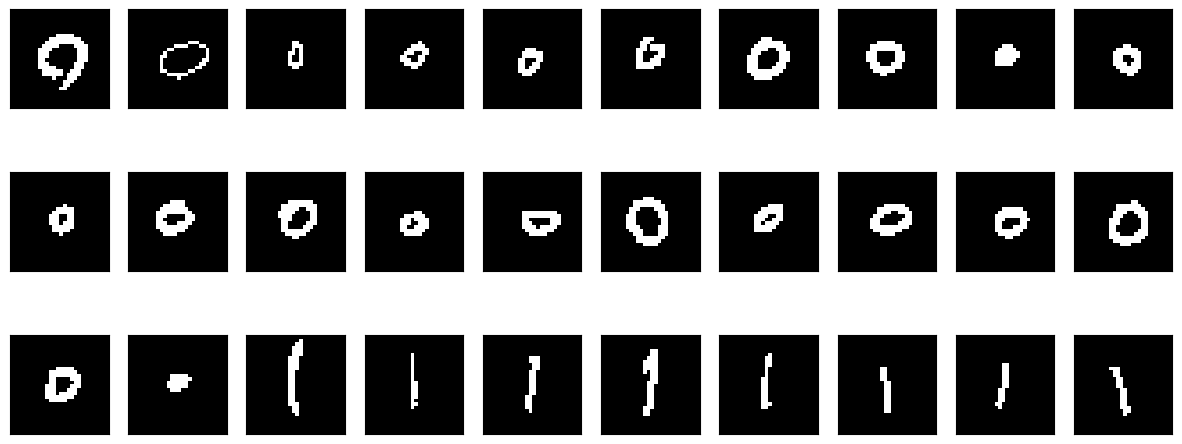

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x[i+0].reshape(28, 28).astype('uint8'), cmap=plt.cm.binary)

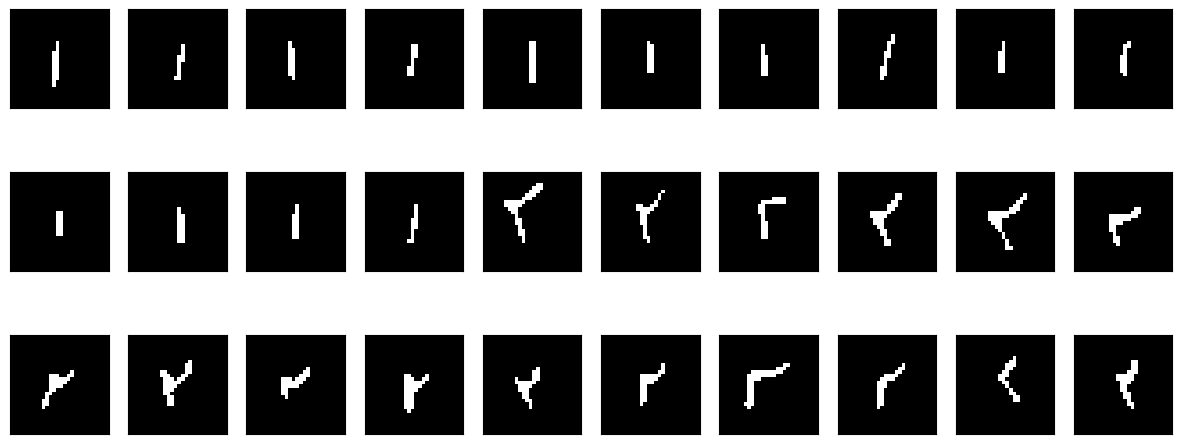

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x[i+30].reshape(28, 28).astype('uint8'), cmap=plt.cm.binary)

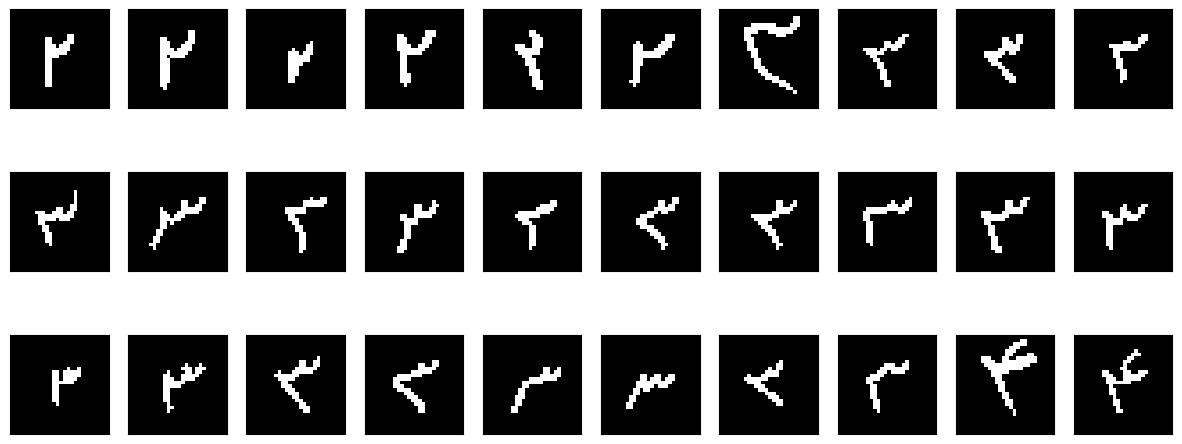

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x[i+60].reshape(28, 28).astype('uint8'), cmap=plt.cm.binary)

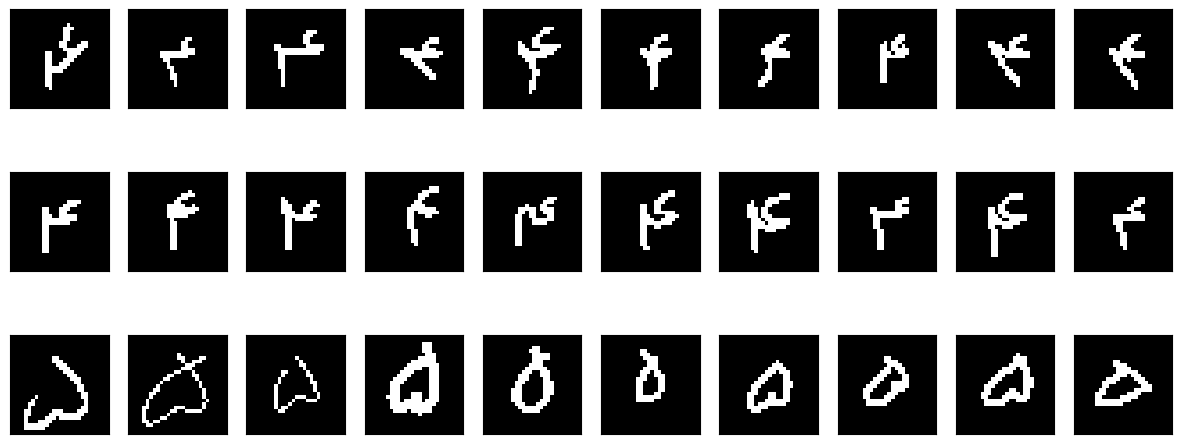

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x[i+90].reshape(28, 28).astype('uint8'), cmap=plt.cm.binary)

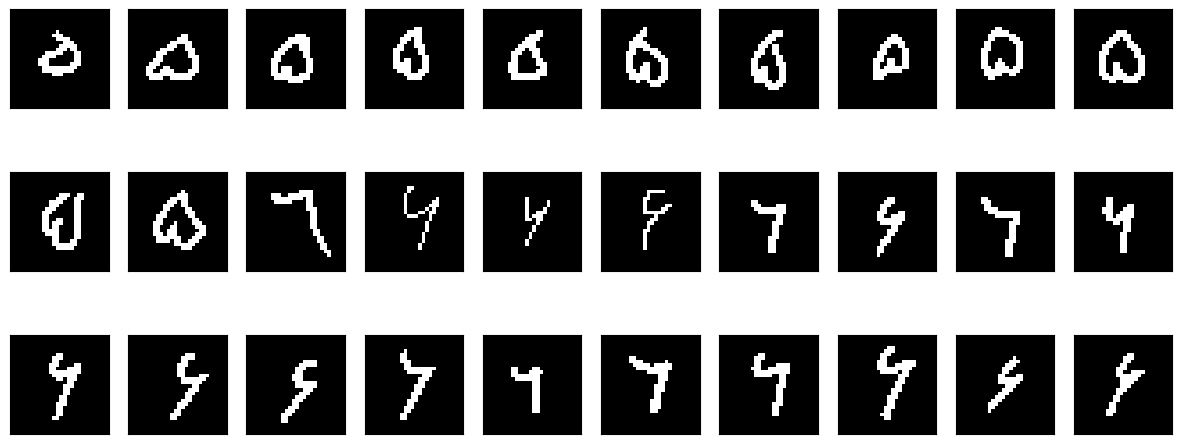

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x[i+120].reshape(28, 28).astype('uint8'), cmap=plt.cm.binary)

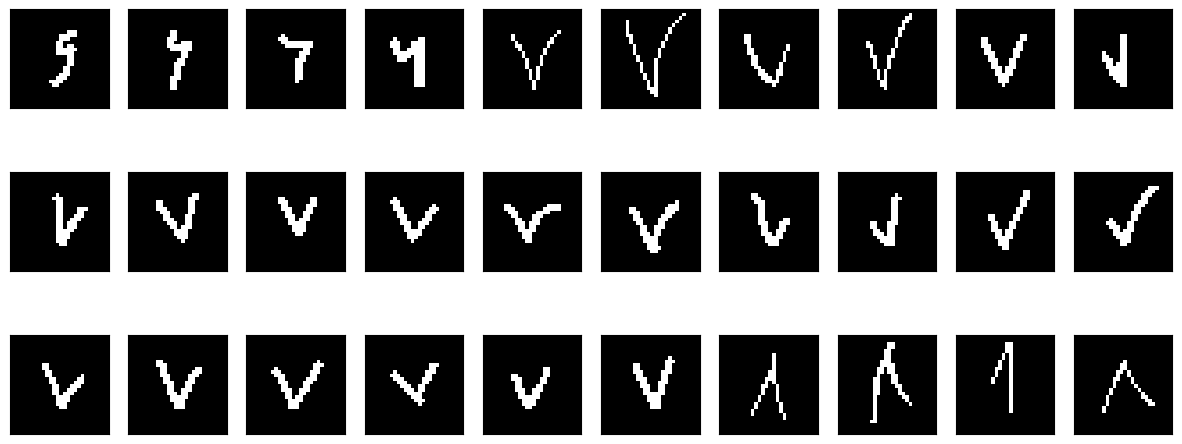

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x[i+150].reshape(28, 28).astype('uint8'), cmap=plt.cm.binary)

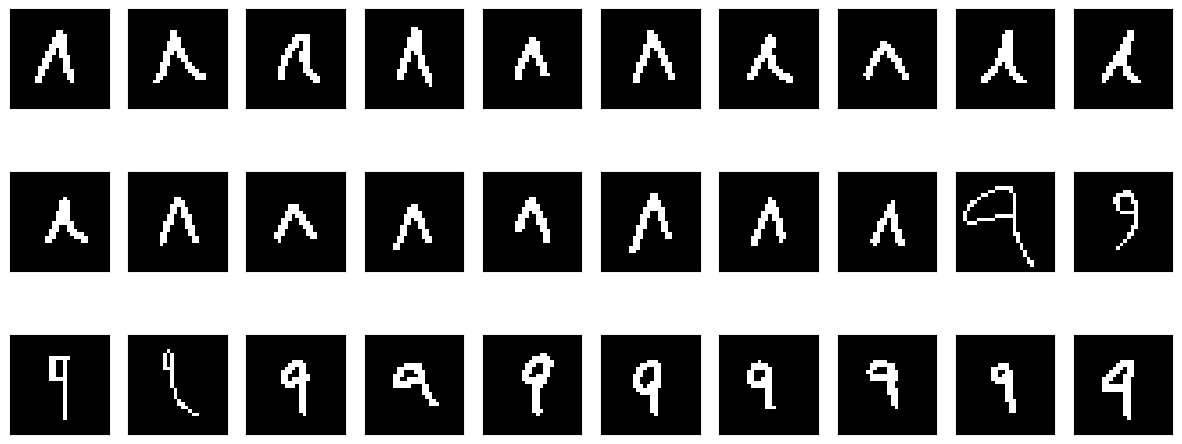

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x[i+180].reshape(28, 28).astype('uint8'), cmap=plt.cm.binary)

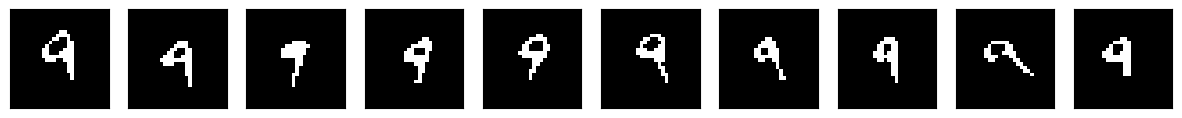

In [ ]:
fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x[i+210].reshape(28, 28).astype('uint8'), cmap=plt.cm.binary)

In [ ]:
# Split data into train, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=13)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=13)

x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape
#print(y_train)

((154, 28, 28), (46, 28, 28), (20, 28, 28), (154,), (46,), (20,))

In [ ]:
# Build and compile the model
def ann(input_shape, classes):
    X_input = Input(input_shape)
    X = Flatten()(X_input)
    X = Dense(100, activation='relu')(X)
    X = Dense(100, activation='relu')(X)
    X = Dense(100, activation='relu')(X)
    X = Dense(classes, activation='softmax')(X)
    return Model(inputs=X_input, outputs=X)

In [ ]:
model = ann((28, 28), 10)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 99710 (389.49 KB)
Trainable params: 99710 (38

In [ ]:
# Define callbacks
earlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
check_point = ModelCheckpoint(filepath='/content/drive/MyDrive/best_weights', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# Train the model
history = model.fit(x_train, y_train,
                    epochs=50,
                    validation_data=(x_valid, y_valid),
                    callbacks=[earlyStop, check_point],
                    batch_size=60)

Epoch 1/50
1/3 [=========>....................] - ETA: 3s - loss: 254.3873 - accuracy: 0.0667
Epoch 1: val_loss improved from inf to 150.48828, saving model to /content/drive/MyDrive/best_weights
3/3 [==============================] - 3s 439ms/step - loss: 208.6692 - accuracy: 0.0844 - val_loss: 150.4883 - val_accuracy: 0.1304
Epoch 2/50
1/3 [=========>....................] - ETA: 0s - loss: 153.0074 - accuracy: 0.0500
Epoch 2: val_loss improved from 150.48828 to 100.57076, saving model to /content/drive/MyDrive/best_weights
3/3 [==============================] - 1s 356ms/step - loss: 137.4732 - accuracy: 0.0909 - val_loss: 100.5708 - val_accuracy: 0.0652
Epoch 3/50
1/3 [=========>....................] - ETA: 0s - loss: 81.0284 - accuracy: 0.1167
Epoch 3: val_loss improved from 100.57076 to 83.91301, saving model to /content/drive/MyDrive/best_weights
3/3 [==============================] - 1s 439ms/step - loss: 92.5523 - accuracy: 0.1039 - val_loss: 83.9130 - val_accuracy: 0.1522
Epoch

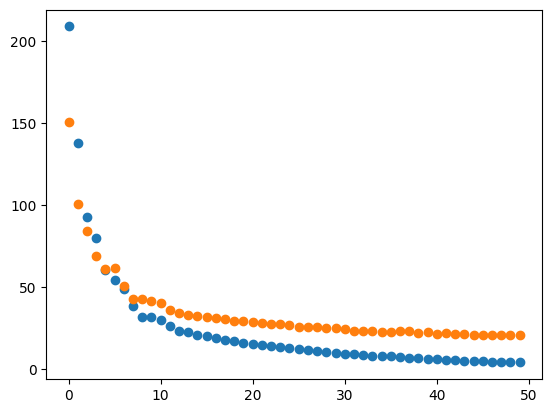

In [ ]:
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

plt.scatter(range(0, len(train_loss)), train_loss, label='Train loss')
plt.scatter(range(0, len(train_loss)), valid_loss, label='Valid loss')
plt.show()

1/1 [==============================] - 0s 67ms/step


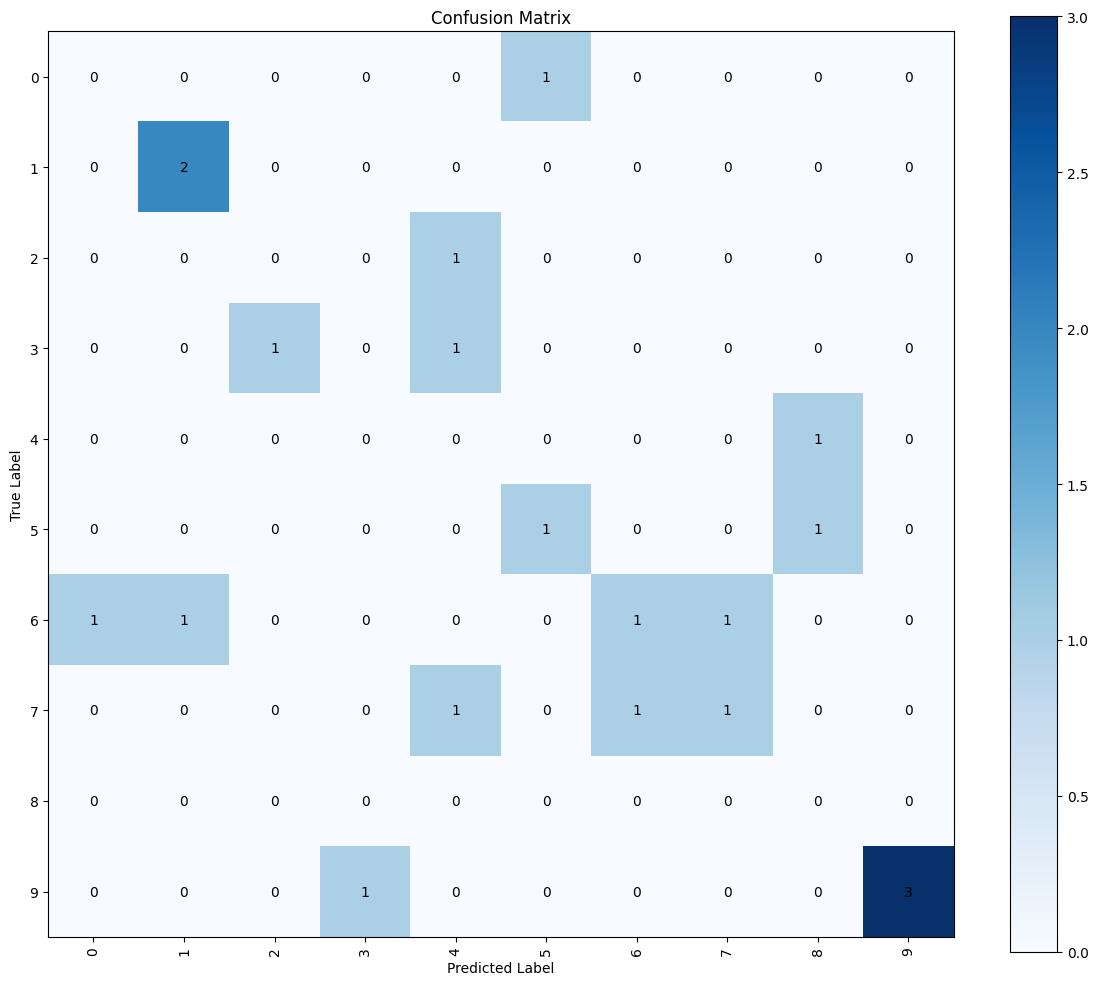

1/1 [==============================] - 0s 36ms/step - loss: 12.9776 - accuracy: 0.4000
Accuracy: 0.4
Loss: 12.977632522583008


In [ ]:
def predict(x):
    y_pred_1 = model.predict(x)
    y_pred = np.argmax(y_pred_1, axis=1)
    return y_pred

def show_confusion_matrix(y_true, y_pred, x_test, y_test):
    classes = unique_labels(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')

    plt.tight_layout()
    plt.show()

    accuracy = accuracy_score(predict(x_test), y_test)

    loss = model.evaluate(x_test, y_test)[0]

    print(f'Accuracy: {accuracy}')
    print(f'Loss: {loss}')

# Display confusion matrix, accuracy, and loss
show_confusion_matrix(y_test, predict(x_test), x_test, y_test)

# **CNN**

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Add, Input, Activation

from tensorflow.keras.losses import sparse_categorical_crossentropy

from tensorflow.keras.activations import relu, sigmoid, softmax

from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Model

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
def cnn(input_shape, classes):
    X_input = Input(input_shape)

    X = Conv2D(filters=32, kernel_size=3, strides=1)(X_input)
    X = Activation(relu)(X)
    X = Conv2D(filters=64, kernel_size=3, strides=1)(X)
    X = Activation(relu)(X)
    X = Conv2D(filters=128, kernel_size=3, strides=1)(X)
    X = Activation(relu)(X)

    X = Flatten()(X)
    X = Dense(100, activation=relu, kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3))(X)

    X = Dense(50, activation=relu, kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3))(X)

    X = Dense(30, activation=relu, kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3))(X)

    X = Dense(classes, activation=softmax, kernel_regularizer=l2(1e-3), bias_regularizer=l2(1e-3))(X)
    return Model(inputs=X_input, outputs=X)

In [ ]:
model = cnn((28, 28, 1), len(set(y)))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_12 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 activation_13 (Activation)  (None, 24, 24, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 activation_14 (Activation)  (None, 22, 22, 128)       0   

In [ ]:
earlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

check_point = ModelCheckpoint(filepath='best_weights' , monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train,
         epochs=50,
         validation_data=(x_valid, y_valid),
         callbacks=[earlyStop, check_point],
         batch_size=60)

Epoch 1/50
1/3 [=========>....................] - ETA: 4s - loss: 8.2816 - accuracy: 0.0500
Epoch 1: val_loss improved from inf to 25.21367, saving model to best_weights
3/3 [==============================] - 4s 1s/step - loss: 16.9883 - accuracy: 0.1039 - val_loss: 25.2137 - val_accuracy: 0.1087
Epoch 2/50
1/3 [=========>....................] - ETA: 0s - loss: 20.3403 - accuracy: 0.1333
Epoch 2: val_loss improved from 25.21367 to 14.13561, saving model to best_weights
3/3 [==============================] - 1s 727ms/step - loss: 17.8721 - accuracy: 0.0909 - val_loss: 14.1356 - val_accuracy: 0.1522
Epoch 3/50
1/3 [=========>....................] - ETA: 0s - loss: 12.4973 - accuracy: 0.1667
Epoch 3: val_loss improved from 14.13561 to 9.09222, saving model to best_weights
3/3 [==============================] - 1s 711ms/step - loss: 11.1225 - accuracy: 0.1623 - val_loss: 9.0922 - val_accuracy: 0.1304
Epoch 4/50
1/3 [=========>....................] - ETA: 0s - loss: 8.5639 - accuracy: 0.183

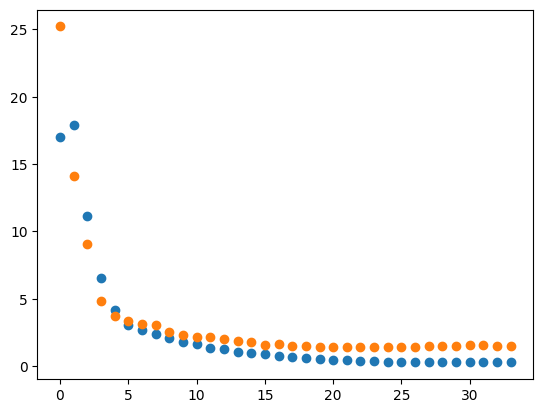

In [ ]:
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

plt.scatter(range(0, len(train_loss)), train_loss, label='Train loss')
plt.scatter(range(0, len(train_loss)), valid_loss, label='Valid loss')
plt.show()

1/1 [==============================] - 0s 81ms/step


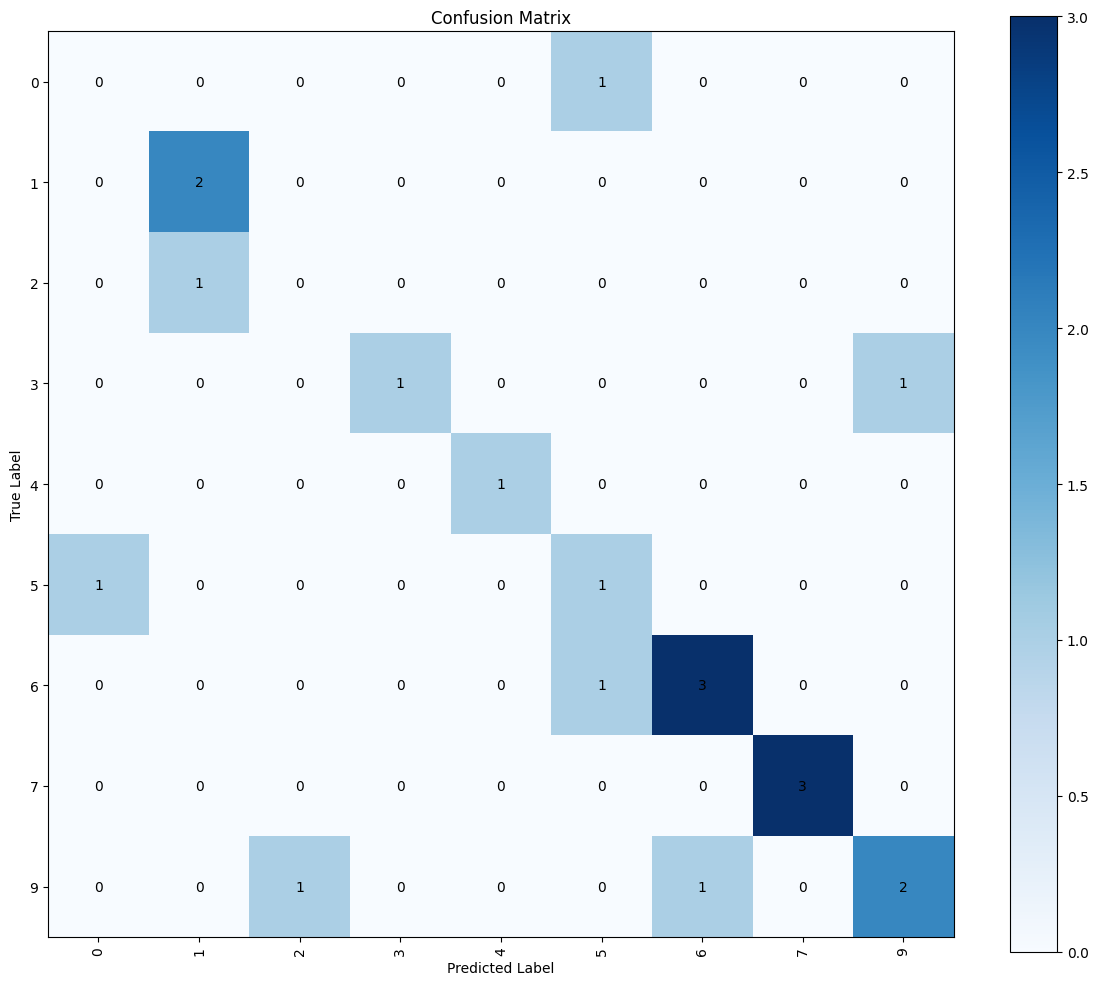

1/1 [==============================] - 0s 34ms/step - loss: 2.2054 - accuracy: 0.6500
Accuracy: 0.65
Loss: 2.205420970916748


In [ ]:
def predict(x):
    y_pred_1 = model.predict(x)
    y_pred = np.argmax(y_pred_1, axis=1)
    return y_pred

def show_confusion_matrix(y_true, y_pred, x_test, y_test):
    classes = unique_labels(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')

    plt.tight_layout()
    plt.show()

    accuracy = accuracy_score(predict(x_test), y_test)

    loss = model.evaluate(x_test, y_test)[0]

    print(f'Accuracy: {accuracy}')
    print(f'Loss: {loss}')

# Display confusion matrix, accuracy, and loss
show_confusion_matrix(y_test, predict(x_test), x_test, y_test)

# **Data Augmentation**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Reshape data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Creating an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)

# Fit the ImageDataGenerator on training data
datagen.fit(x_train)

# Create a generator for augmented data
augmented_generator = datagen.flow(x_train, y_train, batch_size=32)

In [ ]:
earlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

check_point = ModelCheckpoint(filepath='best_weights' , monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(augmented_generator,
         epochs=50,
         validation_data=(x_valid, y_valid),
         callbacks=[earlyStop, check_point],
         batch_size=60)

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 0.3346 - accuracy: 0.9351
Epoch 1: val_loss improved from inf to 0.89969, saving model to best_weights
5/5 [==============================] - 2s 378ms/step - loss: 0.3346 - accuracy: 0.9351 - val_loss: 0.8997 - val_accuracy: 0.7826
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.3273 - accuracy: 0.9675
Epoch 2: val_loss improved from 0.89969 to 0.76043, saving model to best_weights
5/5 [==============================] - 2s 487ms/step - loss: 0.3273 - accuracy: 0.9675 - val_loss: 0.7604 - val_accuracy: 0.8043
Epoch 3/50
4/5 [=======================>......] - ETA: 0s - loss: 0.3581 - accuracy: 0.9426
Epoch 3: val_loss did not improve from 0.76043
5/5 [==============================] - 0s 34ms/step - loss: 0.3732 - accuracy: 0.9416 - val_loss: 0.8962 - val_accuracy: 0.8043
Epoch 4/50
3/5 [=================>............] - ETA: 0s - loss: 0.4171 - accuracy: 0.9583
Epoch 4: val_loss did not improve from 0.

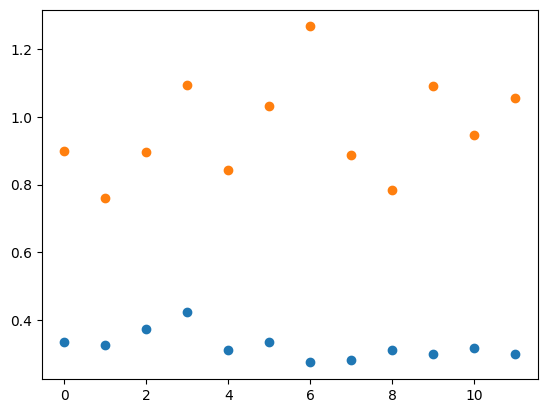

In [ ]:
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

plt.scatter(range(0, len(train_loss)), train_loss, label='Train loss')
plt.scatter(range(0, len(train_loss)), valid_loss, label='Valid loss')
plt.show()

1/1 [==============================] - 0s 19ms/step


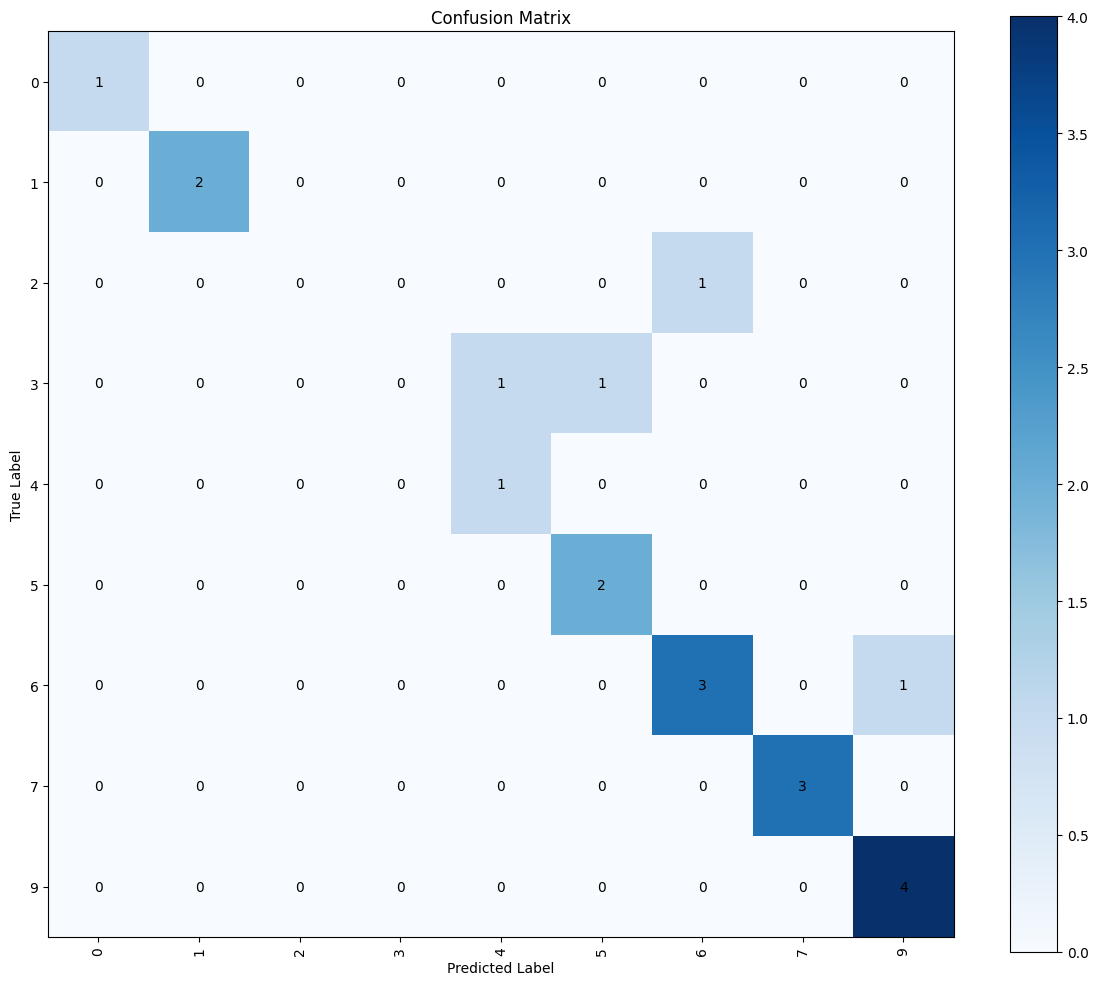

1/1 [==============================] - 0s 25ms/step - loss: 2.8352 - accuracy: 0.8000
Accuracy: 0.8
Loss: 2.8351757526397705


In [ ]:
def predict(x):
    y_pred_1 = model.predict(x)
    y_pred = np.argmax(y_pred_1, axis=1)
    return y_pred

def show_confusion_matrix(y_true, y_pred, x_test, y_test):
    classes = unique_labels(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(12, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, str(cm[i, j]), ha='center', va='center')

    plt.tight_layout()
    plt.show()

    accuracy = accuracy_score(predict(x_test), y_test)

    loss = model.evaluate(x_test, y_test)[0]

    print(f'Accuracy: {accuracy}')
    print(f'Loss: {loss}')

# Display confusion matrix, accuracy, and loss
show_confusion_matrix(y_test, predict(x_test), x_test, y_test)

# **Transfer learning final **


In [ ]:
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from google.colab import drive

drive.mount('/content/drive')

# Set paths
train_path = '/content/drive/MyDrive/persian-digits'

# Open and convert images to binary matrices for training set
def open_file(folder_name, inplist, index):
    for filename in glob.glob(os.path.join(folder_name, '*.jpg')):
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        _, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
        inplist[index].append(img_binary)

train_images = [[] for _ in range(10)]

for i in range(10):
    path = os.path.join(train_path, str(i))
    open_file(path, train_images, i)

# Convert lists to numpy arrays
for i in range(10):
    train_images[i] = np.array(train_images[i])
    #print(len(train_images[i]))

#print(len(train_images))

# Check if the number of images is consistent
num_images_per_class = 22

# Prepare data for training
x = np.concatenate([train_images[i][:num_images_per_class] for i in range(10)])
y = np.array([i for i in range(10) for _ in range(num_images_per_class)])
# Split data into train, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=13)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=13)

x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape
#print(y_train)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


((154, 28, 28), (46, 28, 28), (20, 28, 28), (154,), (46,), (20,))

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# بارگذاری داده‌های MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# آماده‌سازی داده‌ها
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# ساخت یک مدل CNN پایه
base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# اضافه کردن لایه‌های جدید
base_model.add(layers.Flatten())
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))

# منجمد کردن لایه‌های پایین مدل
base_model.layers[0].trainable = False
base_model.layers[1].trainable = False
base_model.layers[2].trainable = False

# کompile مدل
base_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# آموزش مدل
history = base_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# ذخیره وزن‌های مدل
base_model.save_weights('mnist_transfer_learning_weights.h5')


Epoch 1/5
938/938 [==============================] - 5s 4ms/step - loss: 0.3101 - accuracy: 0.9139 - val_loss: 0.0968 - val_accuracy: 0.9718
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0954 - accuracy: 0.9708 - val_loss: 0.0713 - val_accuracy: 0.9776
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0697 - accuracy: 0.9785 - val_loss: 0.0478 - val_accuracy: 0.9844
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0492 - val_accuracy: 0.9845
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0484 - accuracy: 0.9847 - val_loss: 0.0442 - val_accuracy: 0.9864


Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0501 - val_accuracy: 0.9841
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0380 - accuracy: 0.9878 - val_loss: 0.0380 - val_accuracy: 0.9879
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0323 - accuracy: 0.9900 - val_loss: 0.0558 - val_accuracy: 0.9832
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0357 - val_accuracy: 0.9894
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0341 - val_accuracy: 0.9903


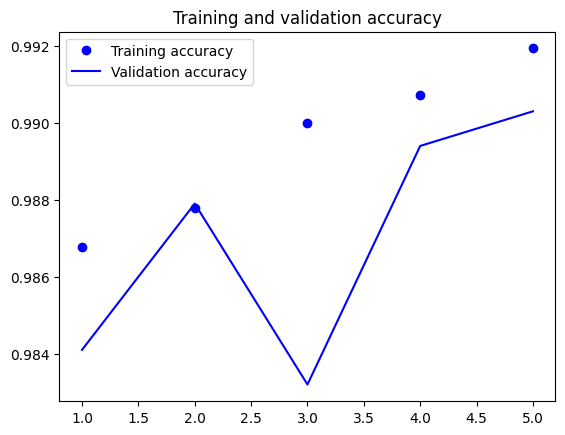

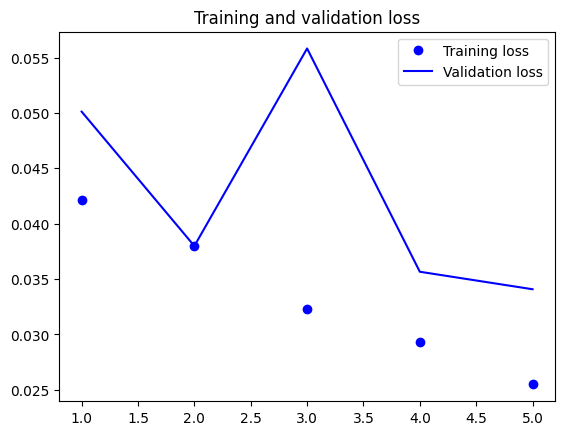

In [ ]:
import matplotlib.pyplot as plt

# Function to display images and accuracy/loss metrics for each training epoch
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Training accuracy and validation accuracy
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    # Training loss and validation loss
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

# Train the model and save the training history
history = base_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Display the training results
plot_training(history)


In [ ]:

# using vgg
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
from sklearn.metrics import accuracy_score
from tensorflow.keras.applications import VGG16
def vgg_16(input_shape):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    x = Dense(50, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

model = vgg_16(input_shape=(32, 32, 3))

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

np.random.seed(13)

earlyStop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')

check_point = ModelCheckpoint(filepath='best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def show_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:

#wiht out using vgg
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# بارگذاری داده‌های MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# آماده‌سازی داده‌ها
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# ساخت یک مدل CNN پایه
base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# اضافه کردن لایه‌های جدید
base_model.add(layers.Flatten())
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))

# کامپایل مدل
base_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# آموزش مدل
history = base_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# ذخیره وزن‌های مدل
base_model.save_weights('mnist_transfer_learning_weights.h5')

# بارگذاری وزن‌های مدل
base_model.load_weights('mnist_transfer_learning_weights.h5')

# ساخت مدل جدید بدون تابع VGG
new_model = models.Sequential()
new_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
new_model.add(layers.Flatten())
new_model.add(layers.Dense(64, activation='relu'))
new_model.add(layers.Dense(10, activation='softmax'))

# استفاده از وزن‌های آموزش دیده شده برای مدل جدید
for new_layer, base_layer in zip(new_model.layers[0:7], base_model.layers[0:7]):
    new_layer.set_weights(base_layer.get_weights())

# کامپایل مدل جدید
new_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# نمایش ساختار مدل جدید
new_model.summary()

# آموزش مدل جدید
new_history = new_model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))


Epoch 1/5
938/938 [==============================] - 6s 5ms/step - loss: 0.1749 - accuracy: 0.9469 - val_loss: 0.0508 - val_accuracy: 0.9839
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0494 - accuracy: 0.9850 - val_loss: 0.0468 - val_accuracy: 0.9846
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.0406 - val_accuracy: 0.9871
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0286 - accuracy: 0.9907 - val_loss: 0.0309 - val_accuracy: 0.9908
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0222 - accuracy: 0.9930 - val_loss: 0.0303 - val_accuracy: 0.9897
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pool

In [ ]:
import os
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set your paths
train_path = '/content/drive/MyDrive/persian-digits'

# Open and convert images to binary matrices for training set
def open_file(folder_name, inplist, index):
    for filename in glob.glob(os.path.join(folder_name, '*.jpg')):
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        _, img_binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
        inplist[index].append(img_binary)

train_images = [[] for _ in range(10)]

for i in range(10):
    path = os.path.join(train_path, str(i))
    open_file(path, train_images, i)

# Convert lists to numpy arrays
for i in range(10):
    train_images[i] = np.array(train_images[i])

# Check if the number of images is consistent
num_images_per_class = 22

# Prepare data for training
x = np.concatenate([train_images[i][:num_images_per_class] for i in range(10)])
y = np.array([i for i in range(10) for _ in range(num_images_per_class)])
# Split data into train, validation, and test sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=13)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.3, random_state=13)

x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape

# Define the expand_and_rgb function
def expand_and_rgb(x):
    rgb_image = cv2.resize(x, (32, 32))
    rgb_image = ((rgb_image+abs(rgb_image.min()))/(rgb_image.max()-rgb_image.min()))
    return rgb_image

# Apply the expand_and_rgb function to the datasets
x_train_rgb = np.array([expand_and_rgb(img) for img in x_train])
x_valid_rgb = np.array([expand_and_rgb(img) for img in x_valid])
x_test_rgb = np.array([expand_and_rgb(img) for img in x_test])


Mounted at /content/drive


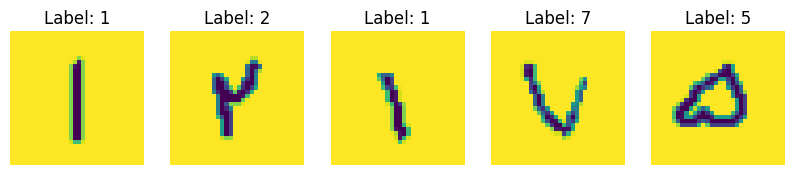

In [ ]:
import matplotlib.pyplot as plt

# تصاویر را به صورت تصادفی انتخاب کنید
num_images_to_show = 5
random_indices = np.random.choice(len(x_train_rgb), num_images_to_show, replace=False)

# نمایش تصاویر و مقدار واقعی آن‌ها
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices, 1):
    plt.subplot(1, num_images_to_show, i)
    plt.imshow(x_train_rgb[idx])
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.show()


# **Transfer learning**

In [ ]:
import cv2

mid = []

def expand_and_rgb(x):
    # rgb_image = np.pad(x.reshape(8, 8), pad_width=12)

    rgb_image = cv2.resize(x, (32, 32))

    rgb_image = cv2.cvtColor(np.array(rgb_image, dtype='uint8'), cv2.COLOR_GRAY2RGB)

    rgb_image = ((rgb_image+abs(rgb_image.min()))/(rgb_image.max()-rgb_image.min()))

    return rgb_image

for i in range(x_train.shape[0]):
    mid.append(expand_and_rgb(x_train[i]))

x_train = mid.copy()
mid = []

for i in range(x_test.shape[0]):
    mid.append(expand_and_rgb(x_test[i]))

x_test = mid.copy()
mid = []

for i in range(x_valid.shape[0]):
    mid.append(expand_and_rgb(x_valid[i]))

x_valid = mid.copy()
mid = []

mid = np.array(mid)

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
x_valid = np.array(x_valid)

np.array(x_train).shape, np.array(x_valid).shape, np.array(x_test).shape, y_train.shape, y_valid.shape, y_test.shape,

((154, 32, 32, 3), (46, 32, 32, 3), (20, 32, 32, 3), (154,), (46,), (20,))

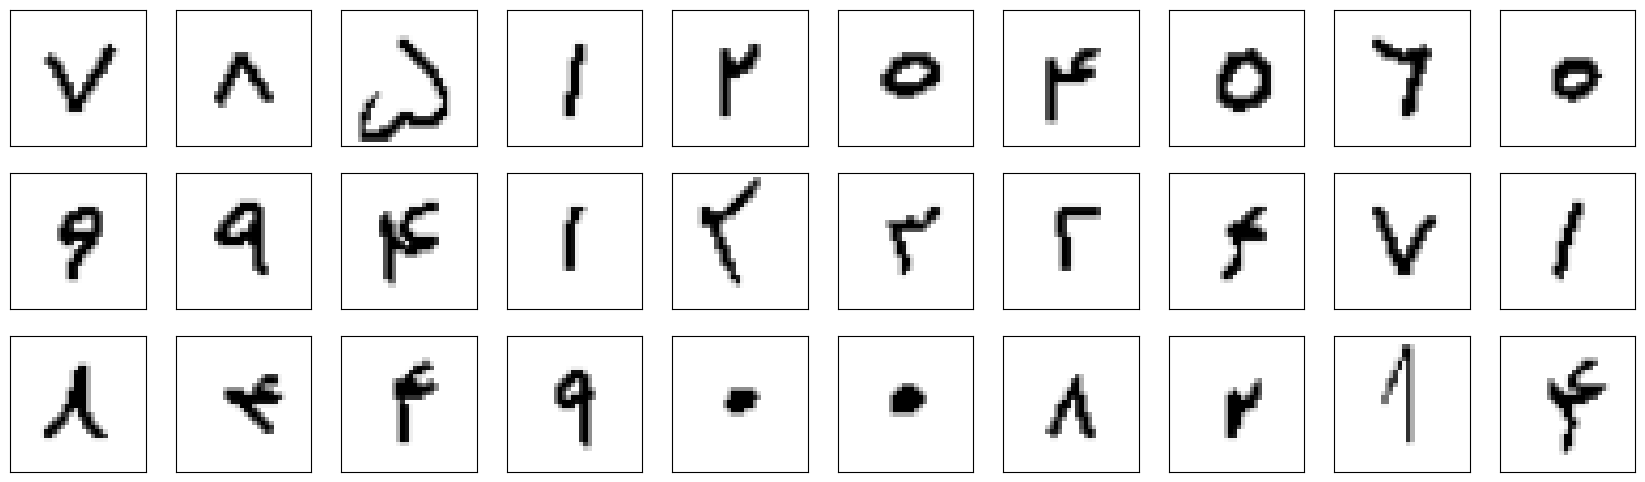

In [ ]:
fig = plt.figure(figsize=(21, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap=plt.cm.binary)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16

def vgg_16(input_shape):

    # weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output

    x = Flatten()(x)
    x = Dense(50, activation='relu')(x)
    predictions = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    return model

In [ ]:
model = vgg_16(input_shape=(32, 32, 3))

model.compile(optimizer='adam',
              loss=[sparse_categorical_crossentropy],
              metrics=['accuracy'])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# تعداد تصاویر مورد نظر برای هر عدد
num_images_per_digit = 20

# تابع برای محدود کردن تصاویر به 20 تصویر برای هر عدد
def limit_images_per_digit(images, labels, num_images_per_digit):
    limited_images = []
    limited_labels = []

    for digit in range(10):  # برای هر عدد
        digit_count = 0
        for img, label in zip(images, labels):
            if label == digit:
                limited_images.append(img)
                limited_labels.append(label)
                digit_count += 1
                if digit_count >= num_images_per_digit:
                    break

    return np.array(limited_images), np.array(limited_labels)

# تابع پیش‌پردازش تصاویر
def preprocess_images(images):
    resized_images = []
    for img in images:
        # تغییر اندازه تصویر به 32x32
        resized_img = array_to_img(img).resize((32, 32))
        # تبدیل تصویر به آرایه numpy بدون افزودن بُعد اضافی
        resized_img = img_to_array(resized_img)
        # نرمال‌سازی مقادیر پیکسل‌ها
        resized_img /= 255.0
        resized_images.append(resized_img)
    return np.array(resized_images)

# تعریف early stopping و checkpointing
earlyStop = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
check_point = ModelCheckpoint(filepath='best_weights.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# محدود کردن تصاویر آموزشی
x_train_limited, y_train_limited = limit_images_per_digit(x_train, y_train, num_images_per_digit)
# محدود کردن تصاویر اعتبارسنجی
x_valid_limited, y_valid_limited = limit_images_per_digit(x_valid, y_valid, num_images_per_digit)
# محدود کردن تصاویر آزمون
x_test_limited, y_test_limited = limit_images_per_digit(x_test, y_test, num_images_per_digit)

# پردازش تصاویر محدود شده
x_train_processed = preprocess_images(x_train_limited)
x_valid_processed = preprocess_images(x_valid_limited)
x_test_processed = preprocess_images(x_test_limited)

# تعریف مدل
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# آموزش مدل
history = model.fit(x_train_processed, y_train_limited,
                    epochs=15,
                    validation_data=(x_valid_processed, y_valid_limited),
                    callbacks=[earlyStop, check_point],
                    batch_size=60)

# ارزیابی مدل
test_loss, test_acc = model.evaluate(x_test_processed, y_test_limited)
print('Test accuracy:', test_acc)


Epoch 1/15
1/3 [=========>....................] - ETA: 4s - loss: 2.3385 - accuracy: 0.0667
Epoch 1: val_loss improved from inf to 2.28905, saving model to best_weights.h5
3/3 [==============================] - 3s 183ms/step - loss: 2.3354 - accuracy: 0.0909 - val_loss: 2.2890 - val_accuracy: 0.0652
Epoch 2/15
1/3 [=========>....................] - ETA: 0s - loss: 2.2561 - accuracy: 0.2167
Epoch 2: val_loss improved from 2.28905 to 2.19914, saving model to best_weights.h5
3/3 [==============================] - 0s 58ms/step - loss: 2.2340 - accuracy: 0.3052 - val_loss: 2.1991 - val_accuracy: 0.4130
Epoch 3/15
1/3 [=========>....................] - ETA: 0s - loss: 2.1431 - accuracy: 0.6167
Epoch 3: val_loss improved from 2.19914 to 2.09234, saving model to best_weights.h5
3/3 [==============================] - 0s 65ms/step - loss: 2.1449 - accuracy: 0.4416 - val_loss: 2.0923 - val_accuracy: 0.4565
Epoch 4/15
1/3 [=========>....................] - ETA: 0s - loss: 2.0364 - accuracy: 0.5500

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

# محاسبه پیش‌بینی‌ها
y_pred_1 = model.predict(x_test_processed)
y_pred = []
for record in range(x_test_processed.shape[0]):
    y_pred.append(y_pred_1[record].argmax())

y_pred = np.array(y_pred)

# محاسبه دقت
accuracy = accuracy_score(y_pred, y_test_limited)
print('Accuracy:', accuracy)

# نمایش ماتریس اشتباهات
conf_matrix = confusion_matrix(y_test_limited, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

1/1 [==============================] - 0s 64ms/step
Accuracy: 0.7
Confusion Matrix:
[[0 0 0 0 0 1 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 3 0 1]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 1 0 3]]
